In [59]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import preprocessing
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [60]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [61]:
# Fonte: 

df = pd.read_excel("jogo.xlsx")

# Limpeza da Base de Dados


In [62]:
deletar = df.loc[((df.Global_Sales.fillna(0)) == 0) & ((df.Total_Shipped.fillna(0)) == 0)]
a = deletar.index
dados = df.drop(a)

In [63]:
dados["Sales"] = dados["Global_Sales"].fillna(0) + dados["Total_Shipped"].fillna(0)

In [64]:


dados = dados.drop(columns = ["Global_Sales","Total_Shipped","url","status","img_url","NA_Sales" ,"PAL_Sales","JP_Sales" ,"Other_Sales","VGChartz_Score"])


In [65]:
dados = dados.fillna(0)

In [66]:
dados = dados.loc[((dados.Sales != 0 ) & (dados.Critic_Score != 0))]
data = dados


# Análise Exploratória

0.26345550388471317

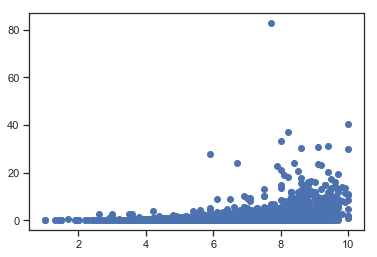

In [67]:
plt.scatter(dados.Critic_Score,dados.Sales);
dados.Critic_Score.corr(dados.Sales)

In [68]:
dados.Genre.values

array(['Sports', 'Platform', 'Racing', ..., 'Puzzle', 'Simulation',
       'Puzzle'], dtype=object)

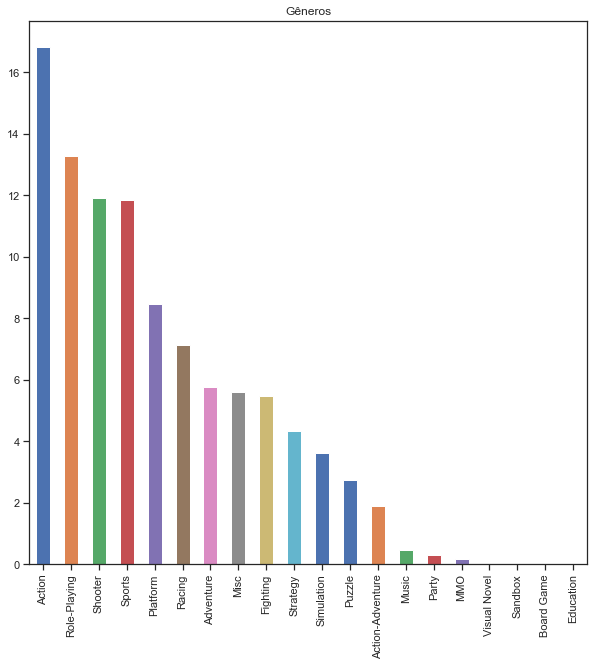

In [69]:
generos = dados.Genre.value_counts(True)*100
generos
plot = generos.plot(kind="bar",title="Gêneros",figsize = (10,10))

In [70]:
quantitativas = ['Rank', 'Critic_Score',
       'User_Score','Vgchartzscore','Sales','Year']

In [71]:
dados.Genre = dados.Genre.astype('category')
dados.ESRB_Rating = dados.ESRB_Rating.astype('category')
dados.Platform = dados.Platform.astype('category')
dados.Publisher = dados.Publisher.astype('category')
dados.Developer = dados.Developer.astype('category')


In [72]:
dataset = dados.loc[:,quantitativas]

In [73]:
x_vars = ['Critic_Score',
       'User_Score','Vgchartzscore','Sales']
y_vars = x_vars

In [74]:
sns.set(style="ticks")

#sns.pairplot(dados, hue="Genre", x_vars=x_vars, y_vars=y_vars);

In [75]:
#sns.pairplot(dados, hue="Genre", kind="reg", x_vars=x_vars, y_vars=y_vars);

# Separação das variaveis e primeiras regressões lineares

In [76]:
from sklearn.model_selection import train_test_split
dados_sales,teste, y_train, y_test = train_test_split(data,data.Sales, test_size=0.25, random_state=RANDOM_SEED)


qualitativas = ['Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer']
quantitativas = ['Rank', 'Critic_Score',
       'User_Score','Vgchartzscore','Sales','Year']


**Regressão para Cópias Vendidas**

In [77]:
# Separaremos as preditoras
quant_sales = quantitativas.copy()
quant_sales.remove('Sales')
np.asarray(dados);

In [78]:
results_quantitativas_sales = regress(((dados_sales.loc[:, quant_sales]).fillna(0)).astype(float), y_train)

In [79]:
results_quantitativas_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     168.3
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          6.21e-161
Time:                        07:39:31   Log-Likelihood:                -8366.6
No. Observations:                3529   AIC:                         1.675e+04
Df Residuals:                    3523   BIC:                         1.678e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            51.0683     17.964      2.843      0.004      15.846      86.290
Rank             -0.0002   9.17e-06    -20.728      0.000      -0.000      -0.000
Critic_Score      0.2185      0.033      6.581      0.000       0.153       0.284
User_Score        0.2138      0.027      7.968      0.000       0.161       0.266
Vgchartzscore     0.0199      0.020      0.985      0.325      -0.020       0.059
Year             -0.0251      0.009     -2.804      0.005      -0.043      -0.008
==============================================================================
Omnibus:                     6442.384   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13791272.896
Skew:                          13.086   Prob(JB):                         0.00
Kurtosis:                     308.134   Cond. No.                     3.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
quant_sales2 = quant_sales.copy()
quant_sales2.remove('Vgchartzscore')

In [81]:
results_quantitativas_sales_2 = regress(((dados_sales.loc[:, quant_sales2]).fillna(0)).astype(float), y_train)

In [82]:
results_quantitativas_sales_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     210.2
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          6.52e-162
Time:                        07:39:31   Log-Likelihood:                -8367.1
No. Observations:                3529   AIC:                         1.674e+04
Df Residuals:                    3524   BIC:                         1.678e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           48.9976     17.841      2.746      0.006      14.018      83.977
Rank            -0.0002   9.14e-06    -20.853      0.000      -0.000      -0.000
Critic_Score     0.2215      0.033      6.697      0.000       0.157       0.286
User_Score       0.2215      0.026      8.629      0.000       0.171       0.272
Year            -0.0240      0.009     -2.707      0.007      -0.041      -0.007
==============================================================================
Omnibus:                     6441.592   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13767571.334
Skew:                          13.083   Prob(JB):                         0.00
Kurtosis:                     307.870   Cond. No.                     3.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Regressão para Nota dos críticos**

In [83]:
dados_score,teste, y_train_score, y_test = train_test_split(data,data.Critic_Score, test_size=0.25, random_state=RANDOM_SEED)
quant_score = quantitativas.copy()
quant_score.remove('Critic_Score')


In [84]:
results_quantitativas_score = regress(((dados_score.loc[:, quant_score]).fillna(0)).astype(float), y_train_score)
results_quantitativas_score.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     143.2
Date:                Thu, 21 Nov 2019   Prob (F-statistic):          1.11e-138
Time:                        07:39:31   Log-Likelihood:                -5950.2
No. Observations:                3529   AIC:                         1.191e+04
Df Residuals:                    3523   BIC:                         1.195e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            32.8216      9.052      3.626      0.000      15.074      50.569
Rank          -8.671e-05   4.67e-06    -18.555      0.000   -9.59e-05   -7.76e-05
User_Score        0.0429      0.014      3.147      0.002       0.016       0.070
Vgchartzscore     0.0530      0.010      5.233      0.000       0.033       0.073
Sales             0.0556      0.008      6.581      0.000       0.039       0.072
Year             -0.0125      0.005     -2.775      0.006      -0.021      -0.004
==============================================================================
Omnibus:                      376.130   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.613
Skew:                          -0.834   Prob(JB):                    7.32e-115
Kurtosis:                       3.891   Cond. No.                     3.52e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Regressão com Dummy para quantidade de cópias vendidas

In [85]:
def dummify(data, column_name):
    """
        Converte a coluna column_name em dummies / one-hot e as adiciona ao dataframe
        retorna uma copia do  df original *sem* a coluna que foi dummified
    """
    df = data.copy()
    # Nota: se você for um econometrista, pode se interessar por usar a opção dropFirst = True na get_dummies
    df2 = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

In [86]:
res = dummify(dados, ['Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer'])
dados_sales,teste_sales, y_train, y_test_sales = train_test_split(res.drop('Sales', 1),res.Sales, test_size=0.25, random_state=RANDOM_SEED)


In [87]:
z = res.drop(columns=quantitativas)

In [88]:
quant_sales2.extend(z)
quant_sales2.remove("Rank")
quant_sales2.remove("Name")
quant_sales2.remove("basename")
quant_sales2.remove("Last_Update")

In [89]:
dummy_sales = regress(((dados_sales.loc[:,quant_sales2]).fillna(0)).astype(float), y_train)

In [90]:
dummy_sales.summary()


In [91]:
valorp = dummy_sales.pvalues
deixar = []
pcrit = 0.10
for indice,valor in valorp.items():
    if valor <= pcrit:
        deixar.append(indice)
del(deixar[0])

In [92]:

params_sales_1 = deixar

In [93]:

dummy_sales2 = regress(((dados_sales.loc[:,params_sales_1]).fillna(0)).astype(float), y_train)


In [94]:
dummy_sales2.summary();

In [95]:
valorp2 = dummy_sales2.pvalues
deixar2 = []
pcrit = 0.10
for indice,valor in valorp2.items():
    if valor <= pcrit:
        deixar2.append(indice)
del(deixar2[0])


In [96]:
params_sales_2 = deixar2

In [97]:

dummy_sales3 = regress(((dados_sales.loc[:,params_sales_2]).fillna(0)).astype(float), y_train)

In [98]:
dummy_sales3.summary();

In [99]:
valorp3 = dummy_sales3.pvalues
deixar3 = []
pcrit = 0.10
for indice,valor in valorp3.items():
    if valor <= pcrit:
        deixar3.append(indice)
del(deixar3[0])


In [100]:
params_sales_3 = deixar3

In [101]:
dummy_sales4 = regress(((dados_sales.loc[:,params_sales_3]).fillna(0)).astype(float), y_train)

In [102]:
dummy_sales4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     44.98
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:39:36   Log-Likelihood:                -7795.5
No. Observations:                3529   AIC:                         1.570e+04
Df Residuals:                    3473   BIC:                         1.605e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1556      0.066      2.374      0.018       0.027       0.284
Genre_Fighting                               0.2691      0.166      1.620      0.105      -0.057       0.595
Genre_MMO                                    1.5761      0.842      1.871      0.061      -0.075       3.227
Genre_Platform                               0.3312      0.141      2.355      0.019       0.055       0.607
Genre_Racing                                 0.2888      0.150      1.927      0.054      -0.005       0.583
Genre_Sports                                 0.5055      0.119      4.246      0.000       0.272       0.739
Platform_DS                                  0.4269      0.155      2.756      0.006       0.123       0.731
Platform_GB                                  5.1296      0.767      6.692      0.000       3.627       6.633
Platform_NES                                19.7116      1.729     11.401      0.000      16.322      23.101
Platform_PS                                  0.5717      0.179      3.197      0.001       0.221       0.922
Platform_PS2                                 0.9811      0.151      6.480      0.000       0.684       1.278
Platform_PS3                                 0.8420      0.128      6.583      0.000       0.591       1.093
Platform_PS4                                 1.6564      0.284      5.839      0.000       1.100       2.213
Platform_SNES                                1.8277      0.637      2.867      0.004       0.578       3.078
Platform_Wii                                 0.8349      0.149      5.588      0.000       0.542       1.128
Platform_X360                                0.6631      0.120      5.515      0.000       0.427       0.899
Platform_XOne                                1.0321      0.335      3.078      0.002       0.375       1.689
Publisher_Arc System Works                2.255e-16   4.34e-15      0.052      0.959   -8.28e-15    8.73e-15
Publisher_Broderbund                         2.9222      1.111      2.630      0.009       0.744       5.101
Publisher_Edmund McMillen                    3.5072      1.111      3.157      0.002       1.329       5.686
Publisher_Facepunch Studios                  4.4972      1.111      4.048      0.000       2.319       6.676
Publisher_Nintendo                           0.9249      0.160      5.775      0.000       0.611       1.239
Publisher_RedOctane                          2.9637      0.911      3.253      0.001       1.178       4.750
Publisher_SCS Software                       2.9122      1.111      2.621      0.009       0.734       5.091
Publisher_Sony Interactive Entertainment     2.3575      1.043      2.259      0.024       0.312       4.403
Publisher_Square               

# Teste da Regressão

**Cópias Vendidas**

In [112]:
sales_teste= sm.add_constant(teste_sales[params_sales_3])
y_previsto_sales = dummy_sales4.predict(sales_teste)



In [113]:
e = 0.1
teste_sales = []
acertos_sales = []
for previsao,real in zip(y_previsto_sales,y_test_sales):
    if previsao <= real + real*e and previsao >= real - real*e:

        acertos_sales.append(1)

    teste_sales.append(0)
    
print((len(acertos_sales)/len(teste_sales))*100)

5.0127442650807135


# Regressão com Dummy para Nota do jogo

In [103]:
dados_score,teste_score, y_train_, y_test_score = train_test_split(res,res.Critic_Score, test_size=0.25, random_state=RANDOM_SEED)
dummy_score = quant_score.copy()
dummy_score.extend(z)
dummy_score.remove("Rank")
dummy_score.remove("Name")
dummy_score.remove("basename")
dummy_score.remove("Last_Update")


In [104]:
results_dummy_score = regress(((dados_score.loc[:,dummy_score]).fillna(0)).astype(float), y_train_)
results_dummy_score.summary();

In [105]:
valorp_2 = results_dummy_score.pvalues
deixar_2 = []
pcrit = 0.10
for indice,valor in valorp_2.items():
    if valor <= pcrit:
        deixar_2.append(indice)
del(deixar_2[0])

In [106]:
quant_score2 = deixar_2

In [107]:
dummy_score_2 = regress(((dados_score.loc[:,quant_score2]).fillna(0)).astype(float), y_train_)
dummy_score_2.summary();

In [108]:
valorp_3 = dummy_score_2.pvalues
deixar_3 = []
pcrit = 0.10
for indice,valor in valorp_3.items():
    if valor <= pcrit:
        deixar_3.append(indice)
del(deixar_3[0])

quant_sales3 = deixar_3

In [109]:
dummy_score_3 = regress(((dados_score.loc[:,quant_sales3]).fillna(0)).astype(float), y_train_)
dummy_score_3.summary();

In [110]:
valorp_4 = dummy_score_3.pvalues
deixar_4 = []
pcrit = 0.10
for indice,valor in valorp_4.items():
    if valor <= pcrit:
        deixar_4.append(indice)
del(deixar_4[0])

quant_sales4 = deixar_4

In [111]:
dummy_score_4 = regress(((dados_score.loc[:,quant_sales4]).fillna(0)).astype(float), y_train_)
dummy_score_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     11.53
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        07:39:42   Log-Likelihood:                -4978.2
No. Observations:                3529   AIC:                         1.057e+04
Df Residuals:                    3224   BIC:                         1.245e+04
Df Model:                         304                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      66.1810      9.655      6.855      0.000      47.250      85.112
User_Score                                                                  0.0224      0.011      1.962      0.050    1.59e-05       0.045
Vgchartzscore                                                               0.0646      0.008      7.606      0.000       0.048       0.081
Sales                                                                       0.0727      0.007     10.677      0.000       0.059       0.086
Year                                                                       -0.0361      0.006     -6.441      0.000      -0.047      -0.025
Genre_Action                                                                1.5220      0.316      4.817      0.000       0.902       2.142
Genre_Action-Adventure                                                      2.1065      0.338      6.240      0.000       1.445       2.768
Genre_Adventure                                                             1.8977      0.321      5.910      0.000       1.268       2.527
Genre_Education                                                             2.3836      1.084      2.198      0.028       0.258       4.510
Genre_Fighting                                                              2.0117      0.323      6.225      0.000       1.378       2.645
Genre_MMO                                                                   1.9938      0.505      3.949      0.000       1.004       2.984
Genre_Misc                                                                  1.8147      0.318      5.706      0.000       1.191       2.438
Genre_Music                                                                 2.4608      0.418      5.893      0.000       1.642       3.279
Genre_Platform                                                              1.9546      0.316      6.180      0.000       1.334       2.575
Genre_Puzzle                                                                2.1533      0.329      6.549      0.000       1.509       2.798
Genre_Racing                                                                1.8381      0.319      5.762      0.000       1.213       2.464
Genre_Role-Playing                                                          2.1895      0.316      6.932      0.000       1.570       2.809
Genre_Sandbox                                                            3.781e-13   5.81e-14      6.504      0.000    2.64e-13    4.92e-13
Genre_Shooter                                                               1.9866      0.318      6.238      0.000       1.362       2.611
Gen

# Teste da regressão

In [114]:
score_teste= sm.add_constant(teste_score[quant_sales4])
y_previsto_score = dummy_score_4.predict(score_teste)

In [115]:
e = 0.10
teste_score = []
acertos_score = []
for previsao,real in zip(y_previsto_score,y_test_score):
    if previsao <= real + real*e and previsao >= real - real*e:

        acertos_score.append(1)

    teste_score.append(0)
    
print((len(acertos_score)/len(teste_score))*100)

48.93797790994053
